In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct

In [2]:
# Base first-order system (PT1)
G = ct.tf([1], [1, 1])

In [3]:
# Dead times to compare
dead_times = [0.0, 0.5, 1.0, 2.0]

In [4]:
t = np.linspace(0, 10, 1000)

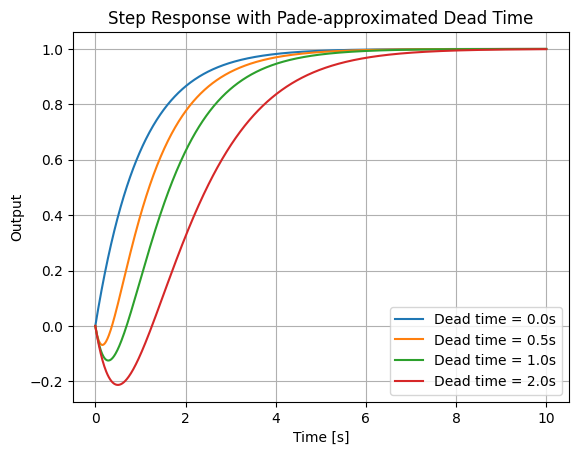

In [5]:
plt.figure()
for Td in dead_times:
    if Td == 0:
        Gd = G
    else:
        # Pade approximation of dead time
        num_delay, den_delay = ct.pade(Td, 1)
        delay = ct.tf(num_delay, den_delay)
        Gd = delay * G

    t_out, y = ct.step_response(Gd, t)
    plt.plot(t_out, y, label=f"Dead time = {Td}s")

plt.xlabel("Time [s]")
plt.ylabel("Output")
plt.title("Step Response with Pade-approximated Dead Time")
plt.legend()
plt.grid()
plt.show()

In [6]:
# Compute undelayed step response
t_sys, y_sys = ct.step_response(G, t)

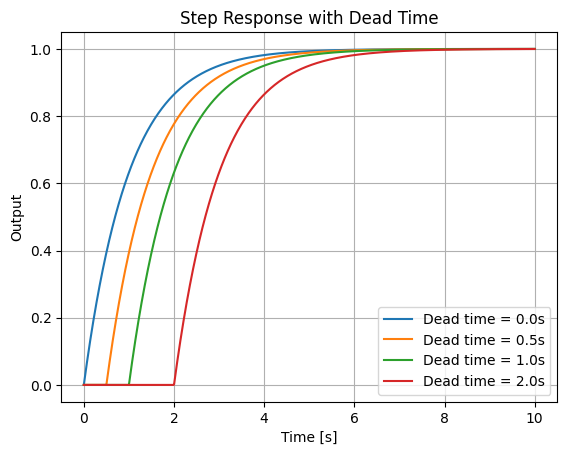

In [7]:
plt.figure()
for Td in dead_times:
    if Td == 0:
        y_delayed = y_sys
    else:
        # True dead time: output is zero until Td, then shifted response
        y_delayed = np.where(
            t >= Td,
            np.interp(t - Td, t_sys, y_sys),
            0.0
        )

    plt.plot(t, y_delayed, label=f"Dead time = {Td}s")

plt.xlabel("Time [s]")
plt.ylabel("Output")
plt.title("Step Response with Dead Time")
plt.legend()
plt.grid()
plt.show()